In [1]:
import numpy as np
from skimage import color, io
from skimage.color import rgb2lab, lab2rgb

import matplotlib.pyplot as plt

In [2]:
# COLOR CODES (BASE):
orange = (209, 81, 52)
green = (77, 152, 57)
blue = (73, 92, 148)
red = (150, 42, 65)
yellow = (190, 168, 49)
light_blue = (61, 116, 183)
black = (27, 29, 24)

In [3]:
original_colors = [orange, green, blue, red, yellow, light_blue, black]

In [4]:
# Convert RGB to LAB
original_colors_rgb = np.array(original_colors) / 255.0  # Normalize RGB values
original_colors_lab = color.rgb2lab(original_colors_rgb)

print(original_colors_lab)

[[ 51.48739853  49.00699801  42.53110693]
 [ 56.4155081  -41.77372985  41.88403012]
 [ 39.92861888   9.18817494 -33.05092282]
 [ 35.05022753  46.26428318  12.38418832]
 [ 68.87867782  -4.78451703  60.59387092]
 [ 48.13371729   3.68218159 -40.75503751]
 [ 10.39175418  -2.18137897   3.1285376 ]]


In [5]:
# COLOR CODES (SAMPLE):
orange = (232, 104, 43)
green = (129, 174, 89)
blue = (100, 112, 186)
red = (206, 90, 103)
yellow = (205, 194, 76)
light_blue = (113, 151, 213)
black = (71, 67, 55)

In [6]:
sample_colors = [orange, green, blue, red, yellow, light_blue, black]

In [7]:
# Convert RGB to LAB
sample_colors_rgb = np.array(sample_colors) / 255.0  # Normalize RGB values
sample_colors_lab = color.rgb2lab(sample_colors_rgb)

print(sample_colors_lab)

[[ 59.19209426  46.38721942  55.68431283]
 [ 66.2593602  -30.02442944  38.61980297]
 [ 49.3033841   15.4642803  -40.50120996]
 [ 53.40284962  47.08352029  15.68186994]
 [ 77.3325106  -10.37376405  58.83679066]
 [ 62.03706174   3.61900268 -35.76382417]
 [ 28.45869795  -0.66834566   7.91116144]]


In [8]:
# For each color, calculate difference in RGB values
differences = []

for i in range(len(original_colors)):
    ori = original_colors_lab[i]
    smp = sample_colors_lab[i]
    
    l_diff = ori[0] - smp[0]
    a_diff = ori[1] - smp[1]
    b_diff = ori[2] - smp[2]
    
    differences.append((l_diff, a_diff, b_diff))

In [9]:
differences

[(-7.704695725881024, 2.619778585358219, -13.153205896388819),
 (-9.843852098269082, -11.749300407739025, 3.2642271489105497),
 (-9.374765221983779, -6.276105362785167, 7.450287134069519),
 (-18.352622085626564, -0.8192371093980739, -3.297681615274083),
 (-8.45383277567926, 5.589247019582743, 1.7570802585617216),
 (-13.903344447559945, 0.06317891279822296, -4.991213333913102),
 (-18.066943761731782, -1.513033310886619, -4.782623833617217)]

In [10]:
total_l_diff = 0
total_a_diff = 0
total_b_diff = 0

for diff in differences:
    total_l_diff += diff[0]
    total_a_diff += diff[1]
    total_b_diff += diff[2]

total_l_diff /= len(original_colors)
total_a_diff /= len(original_colors)
total_b_diff /= len(original_colors)

print(total_l_diff)
print(total_a_diff)
print(total_b_diff)

-12.242865159533062
-1.7264959532956714
-1.964732876807347


In [15]:
image_name = "sample_6.jpg"

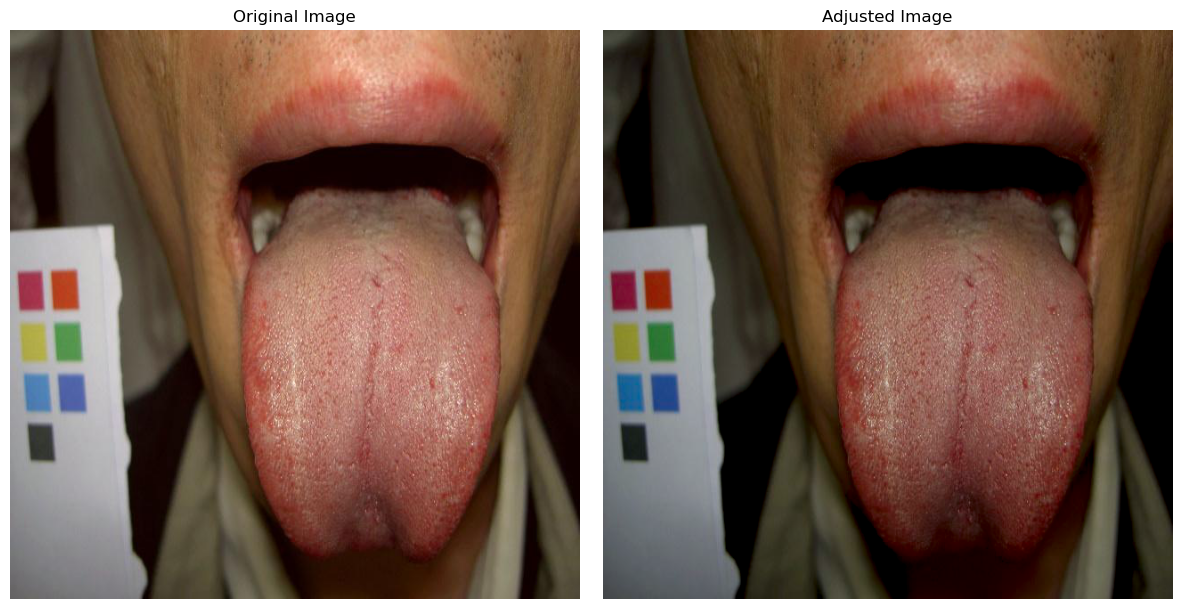

In [18]:
image_path = "Samples (with card)/" + image_name
image_rgb = io.imread(image_path)

image_lab = rgb2lab(image_rgb)

image_lab[:,:,0] += total_l_diff
image_lab[:,:,1] += total_a_diff
image_lab[:,:,2] += total_b_diff

adjusted_image_rgb = lab2rgb(image_lab)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image_rgb)
ax1.set_title("Original Image")
ax1.axis('off')

ax2.imshow(adjusted_image_rgb)
ax2.set_title("Adjusted Image")
ax2.axis('off')

plt.tight_layout()
plt.show()

io.imsave(f"output/{image_name[:-4]}_corrected.jpg", (adjusted_image_rgb * 255).astype(np.uint8))